<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2: Continunity and Differentiation**\
This section goes through limits, continuity, derivatives and Taylor's Theorem

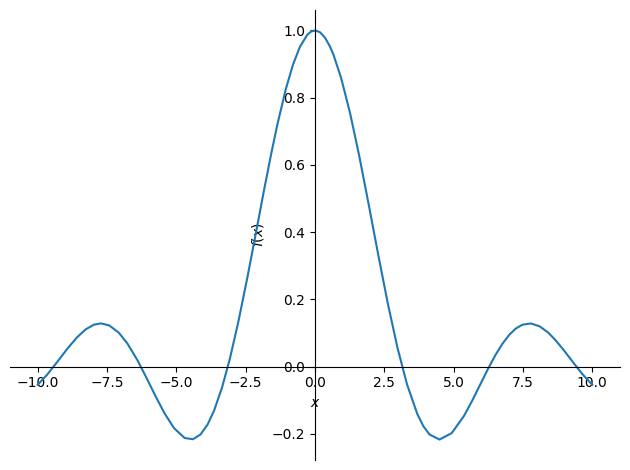

1


0.0470400026866224

In [40]:
#limts

#we can find limits using sympy
from sympy import *

x = symbols('x') #define x as a symbol
expr = sin(x)/x;

# using limit function from sympy
plot(expr)
print(limit(expr, x, 0))
limit(expr,x,3).evalf()

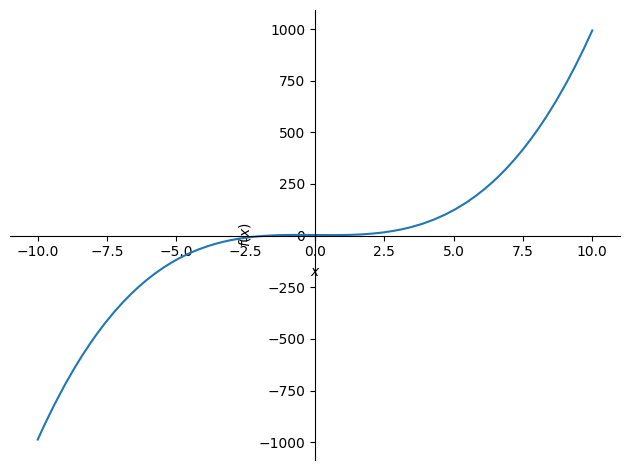

16.1250000000000


-333

In [41]:
#more limits
expr1 = x**3 - x +3;
plot(expr1)
print(limit(expr1,x,2.5))
limit(expr1,x,-7)

In [42]:
#demonstrating continuity. x^3 - x +3 at x = 1

print(limit(expr1,x,1,'-'))
print(limit(expr1,x,1,'+'))
expr1.subs(x,1)
#so the function is continuous at x = 1

3
3


3

In [43]:
#derivatives

pprint(diff(expr,x))
pprint(diff(expr1,x))
diff(expr1,x,2)#second derivative

cos(x)   sin(x)
────── - ──────
  x         2  
           x   
   2    
3⋅x  - 1


6*x

In [44]:
#multivariable differentiation and jacobian
#source: https://stackoverflow.com/questions/48356041/differentiation-of-a-multivariate-function-via-sympy-and-evaluation-at-a-point
def f(u):
    return (u[0]**2 + u[1]**10 + u[2] - 4)**2

u = IndexedBase('u')

print(diff(f(u), u[0]))

4*(u[0]**2 + u[1]**10 + u[2] - 4)*u[0]


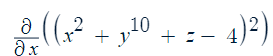
The above code is like this partial derivative

In [45]:
#the jacobian
from autograd import grad
gradient = grad(f)
gradient([1., 1., 1.])

[array(-4.), array(-20.), array(-2.)]

In [55]:
#taylor thereom/series

expr2 = exp(x) #exponential function
n = 10
x0 = 0
r = expr2.subs(x,x0)

for i in range(1,n):
  r += diff(expr2,x,i).subs(x,x0)*(x-x0)**i/factorial(i)

pprint(r)
print(r.subs(x,1).evalf())

expr3 = sin(x) #exponential function
n = 10
x0 = 0
r = expr3.subs(x,x0)

for i in range(1,n):
  r += diff(expr3,x,i).subs(x,x0)*(x-x0)**i/factorial(i)

pprint(r)

r.subs(x,1).evalf()

   9        8      7      6     5    4    3    2        
  x        x      x      x     x    x    x    x         
────── + ───── + ──── + ─── + ─── + ── + ── + ── + x + 1
362880   40320   5040   720   120   24   6    2         
2.71828152557319
   9       7      5    3    
  x       x      x    x     
────── - ──── + ─── - ── + x
362880   5040   120   6     


0.841471009700176

**3.3: Unconstrained Optimization**\
This section goes through necessary and suﬀicent conditions of local minimizers, convexity and global minimizers and gradient descent